# Лабораторная работа 3

# Анимация движения секущей прямой к заданной кривой

Ковалевская В.С., 10. 03. 2022

## Справочная информация

In [1]:
from matplotlib.animation import FuncAnimation #для построения анимации используем ф-цию FuncAnimation 

In [2]:
FuncAnimation?

Init signature:
FuncAnimation(
    fig,
    func,
    frames=None,
    init_func=None,
    fargs=None,
    save_count=None,
    *,
    cache_frame_data=True,
    **kwargs,
)
Docstring:     
Makes an animation by repeatedly calling a function *func*.

.. note::

    You must store the created Animation in a variable that lives as long
    as the animation should run. Otherwise, the Animation object will be
    garbage-collected and the animation stops.

Parameters
----------
fig : `~matplotlib.figure.Figure`
    The figure object used to get needed events, such as draw or resize.

func : callable
    The function to call at each frame.  The first argument will
    be the next value in *frames*.   Any additional positional
    arguments can be supplied via the *fargs* parameter.

    The required signature is::

        def func(frame, *fargs) -> iterable_of_artists

    If ``blit == True``, *func* must return an iterable of all artists
    that were modified or created. This information

обязательный аргумент fig: графическое окно, в котором будет отображаться анимация

обязательный аргумент func: функция одного обязательного аргумента, которая будет вызываться в каждом кадре

необязательный аргумент frames со стандартным значением None: последовательность, элементы которой будут определять значение аргумента функции func при последовательной индексации последовательности от начала до конца

необязательный аргумент init_func со стандартным значением None: функция, которая вызывается перед началом анимации

необязательный аргумент repeat со стандартным значением True: нужно ли повторять анимацию снова после отрисовки всех кадров

необязательный аргумент interval со стандартным значением 200: длительность задержки в миллисекундах между кадрами анимации

## Задание 3.1 (Анимация построения графика аналитически заданной функции)

$\color{red}{Создайте}$ $\color{red}{анимацию}$  построения графика некоторой явно заданной аналитической функции $y = y(x)$ по значениям $x$, последовательно изменяющимся от $x_{min}$ до $x_{max}$ с шагом $step$.

Выполните задание при $y = (x - 5)^2, x_{min} = 0, x_{max} = 10, step = 0.1 $

Выполните задание для произвольной, Вами выбранной, нелинейной аналитической функции $y = y(x), x_{min} = k, x_{max} = k + 5, step = 0.01k$, где $k$ номер Вашего варианта.

In [2]:
import numpy as np #импортируем расширение numpy

In [3]:
import matplotlib.pyplot as plt #импортируем модуль pyplot из пакета matplotlib 

Вызовем специальную команды JN, необходимую для коректного отображения анимации в блокноте

In [4]:
%matplotlib widget

Будем строить анимацию для функции вида $y(x) = (x - 5)^5$ по значениям $x$, изменяющимся от $x_{min} = 0$ до $x_{max} = 10$ с шагом $step = 1$.

In [5]:
y = lambda x: (x - 5)**2 #функция y = (x-5)^2

In [6]:
x_min = 0.; x_max = 10.; step = 0.1 #задали переменные

Cоздадим массив $xarray$

In [7]:
x_array = np.arange(x_min, x_max, step) 
y_array = np.array([y(x) for x in x_array])

На основании двух массивов x_array и y_array создадим матрицу координат точек графика функции $y(x)$. Матрица состоит из двух столбцов. Первый столбец матрицы хранит $x$ -координаты точек, второй столбец хранит $y$ -координаты точек

In [8]:
matrix = np.transpose(np.array([x_array, y_array]))

С помощью функции figure из модуля pyplot создадим графическое окно, в котором в дальнейшем будет осуществляться анимация

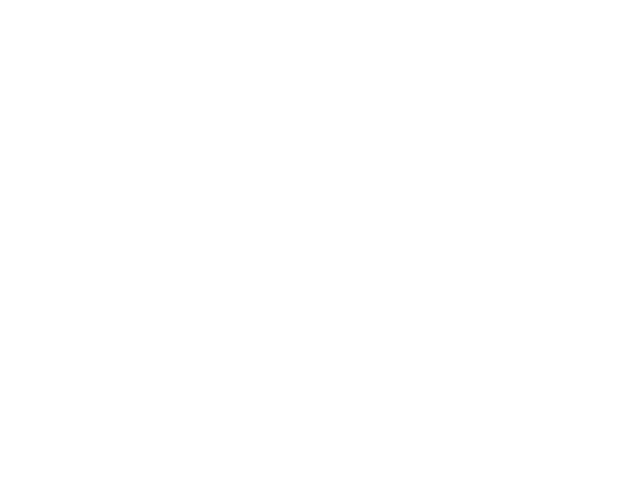

In [9]:
fig1 = plt.figure()

C помощью функции axes из модуля pyplot cоздадим графическую область и зададим для нее пределы по осям

In [10]:
y_min, y_max = np.min(y_array), np.max(y_array)

ax1 = plt.axes()
plt.axis([x_min-1, x_max+1, y_min-1, y_max+1])

(-1.0, 11.0, -1.0, 26.0)

С помощью функции plot из пакета pyplot создадим в графической области ax1 графический объект типа Line2D черного цвета, координаты которого пока не определены

In [11]:
line1, = ax1.plot([], [],'k')
type(line1)

matplotlib.lines.Line2D

Определим пользовательскую функцию одного аргумента at_frame1, которая будет вызываться в каждом кадре анимации.

Аргумент функции at_frame1 является массивом из $x$ -ой и $y$ -ой координат точки графика функции. Функция at_frame1 добавляет к графическому объекту line1 точку с координатами $(x,y)$.

In [12]:
def at_frame1(t):
    """добавляет к объекту line1 точку с координатами (t[0],t[1])
    
    Arguments :
    
    t : последовательность из двух элементов
    
    Returns : None
    """
    x_coord = list(line1.get_xdata())
    y_coord = list(line1.get_ydata())
    
    x_coord.append(t[0])
    y_coord.append(t[1])
    
    line1.set_data(x_coord, y_coord)    
    return None

С помощью функции help извлекем строки документации для пользовательской функции at_frame1

In [14]:
help(at_frame1)

Help on function at_frame1 in module __main__:

at_frame1(t)
    добавляет к объекту line1 точку с координатами (t[0],t[1])
    
    Arguments :
    
    t : последовательность из двух элементов
    
    Returns : None



Для построения анимации полагаем необязательный аргумент frames для функции FuncAnimation следующим образом frames=matrix. Это означает, что количество кадров анимации будет совпадать с количеством строк матрицы matrix. При этом для каждого кадра анимации будет вызываться функция at_frame1 со значением аргумента, равным массиву со значениями текущей строки матрицы matrix.

Вызов функций figure, axes, plot, необходимых для анимации, а также вызов функции FuncAnimation должны располагаться в одной ячейке кода

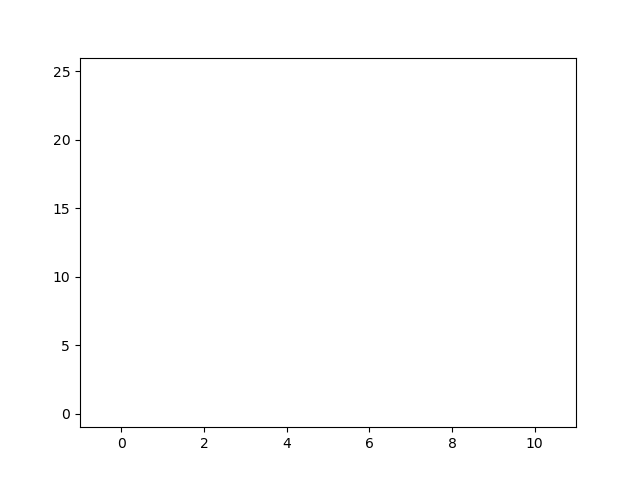

In [13]:
fig1 = plt.figure()
ax1 = plt.axes()
plt.axis([x_min-1, x_max+1, y_min-1, y_max+1])

line1, = ax1.plot([], [],'k')

FuncAnimation(fig1, at_frame1, frames=matrix, repeat=False, interval=10)

Для повторного воспроизведения анимации нужно запустить предыдующую ячеку кода снова.

Создайте аналогичную анимацию для произвольной, Вами выбранной, нелинейной аналитической функции $y = y(x), x_{min} = k$ до $x_{max} = k+5$ с шагом $step = 0.01k$, где $k$ номер Вашего варианта.

**Вариант 5**

$y(x) = x^2 + 3x -7, k = 5, x_{min} = 5, x_{max} = 10, step = 0.05$

In [14]:
y_1 = lambda x: x**2 - 14*x + 1 #задали функцию x^2+3x-7

In [15]:
x_min1 = 5.; x_max1 = 10.; step1 = 0.05 #задали x_min1, x_max1 и шаг step1

In [16]:
x_array1 = np.arange(x_min1, x_max1, step1) #массив чисел от x_min1 до x_min2 с шагом step1
y_array1 = np.array([y_1(x) for x in x_array1]) #массив чисел y_1(x)

In [17]:
matrix1 = np.transpose(np.array([x_array1, y_array1])) # создали массив чисел (х,у)

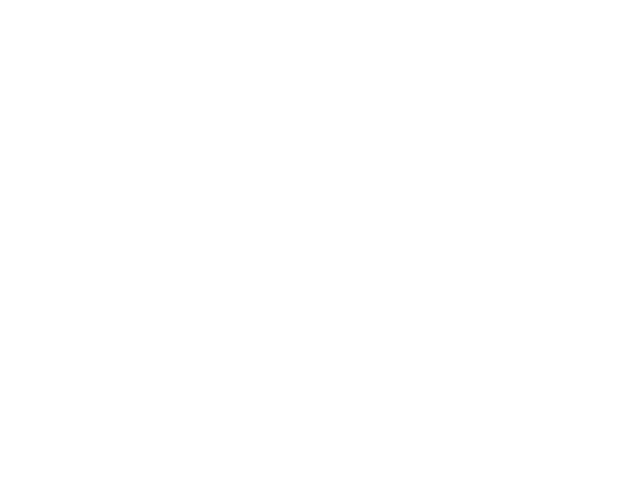

In [18]:
fig_1 = plt.figure() #создали графическое окно с помощью функции figure

In [19]:
y_min1, y_max1 = np.min(y_array1), np.max(y_array1) #нашли минимальный и максимальный элементы из y_array1

ax_1 = plt.axes() #с помощью функции axes создали графическую область
plt.axis([x_min1 - 1, x_max1 + 1, y_min1 - 1, y_max1 + 1]) # задали пределы по осям

(4.0, 11.0, -49.0, -38.2975000000001)

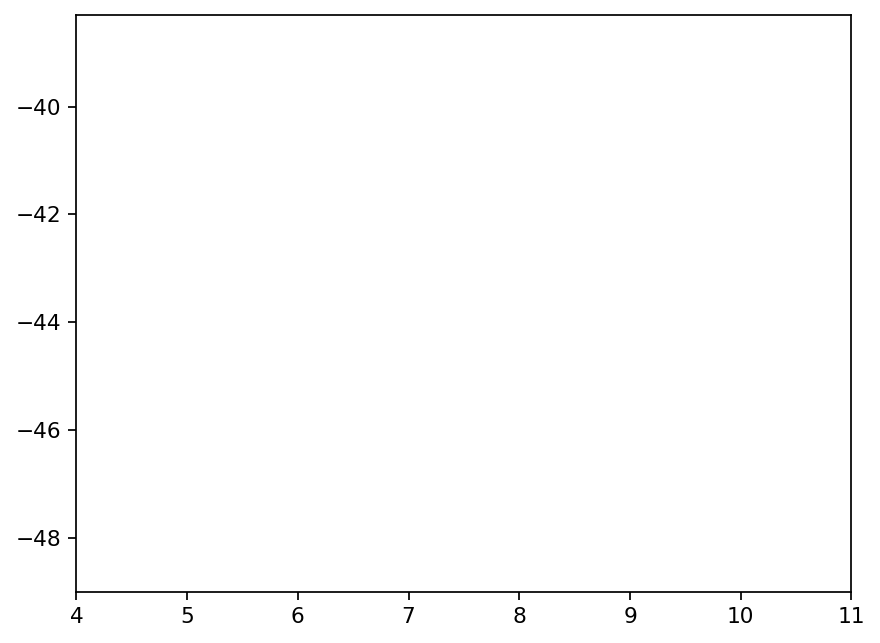

In [20]:
fig_1

In [21]:
line_1, = ax_1.plot([], [], 'k') #присваиваем первый элемент списка
type(line_1) #создали графический объект в графической области типа Line2D

matplotlib.lines.Line2D

In [22]:
def at_frame_1(t):
    """добавляет к объекту line1 точку с координатами (t[0],t[1])
    
    Arguments :
    
    t : последовательность из двух элементов
    
    Returns : None
    """
    x_coord = list(line_1.get_xdata()) #получаем х-вые координаты
    y_coord = list(line_1.get_ydata()) #получаем у-вые координаты
    
    x_coord.append(t[0])
    y_coord.append(t[1])
    
    line_1.set_data(x_coord, y_coord)    
    return None

Вызов функций igure, axes, plot, необходимых для анимации, а также вызов функции FuncAnimation должны располагаться в одной ячейке кода:

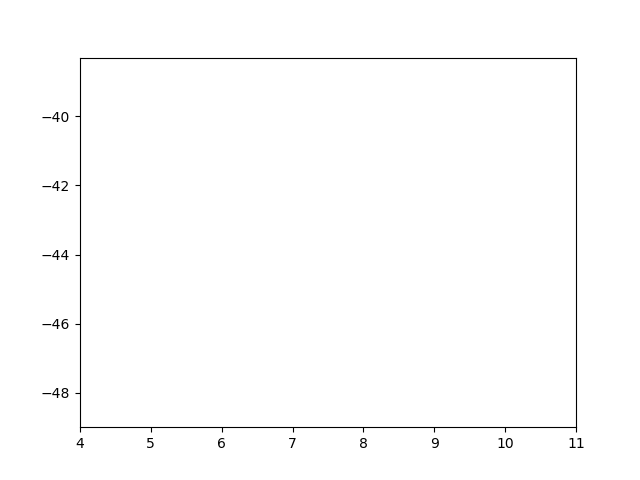

In [23]:
fig_1 = plt.figure()
ax_1 = plt.axes()
plt.axis([x_min1 - 1, x_max1 + 1, y_min1 - 1, y_max1 + 1])

line_1, = ax_1.plot([],[],'k')

FuncAnimation(fig_1, at_frame_1, frames=matrix1, repeat=False, interval=5)

## Задание 3.2 (Анимация движения точки по графику функции)

Пусть аналитический вид функции $y = y(x)$ и значения переменных $x_{min}, x_{max}, step$ задаются такими же, как и при выполнении Задания 3.1, согласно Вашему варианту.

движения точки по графику явно заданной аналитической функции $y = y(x)$ по значениям $x$, последовательно изменяющимся от $x_{min}$ до $x_{max}$ с шагом $step$.

### Реализация Задания 3.2

Последовательно выполним следущие шаги с использованием функций из модуля pyplot:

* с помощью функции figure создадим графическое окно, в котором в дальнейшем будет осуществляться анимация
* с помощью функции axes cоздадим графическую область и зададим для нее пределы по осям
* с помощью функции plot создадим в графической области графический объект типа Line2D черного цвета, координаты которого описывают аналитическую функцию
* с помощью функции plot создадим в графической области графический объект типа Line2D красного цвета с маркером в виде кружка, координаты которого пока неизвестны

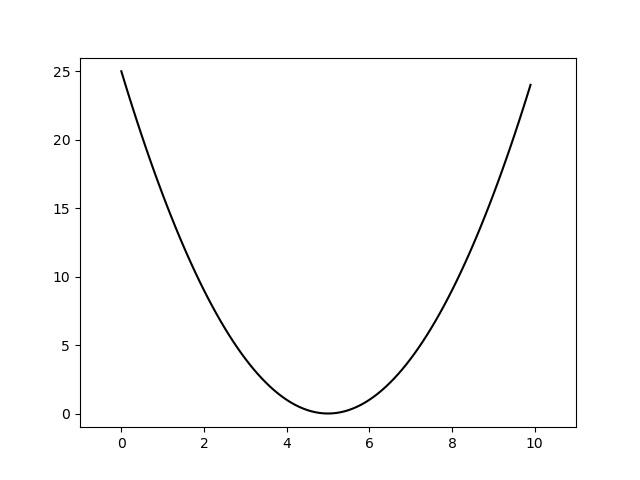

In [26]:
fig2 = plt.figure()

ax2 = plt.axes()
plt.axis([x_min-1, x_max+1, y_min-1, y_max+1]) # пределы по осям Ох и Оу

line1, = ax2.plot(x_array, y_array,'k')  # отображение графика функции
line2, = ax2.plot([], [],'ro') # отображение точки

Определим пользовательскую функцию одного аргумента at_frame2, которая будет вызываться в каждом кадре анимации.

Аргумент функции at_frame2 является массивом из $x$-ой и $y$-ой кординат точки графика функции. Функция at_frame2 задает графический объект line2 единственной точкой с координатами $(x,y)$.

In [24]:
def at_frame2(t):
    """задает объект line2 точкой с координатами (t[0],t[1])
    
    Arguments :
    
    t : последовательность из двух элементов
    
    Returns : None
    """
    line2.set_data(t)
    return None

Для построения анимации полагаем необязательный аргумент frames для функции FuncAnimation следующим образом frames=matrix. Это означает, что количество кадров анимации будет совпадать с количеством строк матрицы matrix. При этом для каждого кадра анимации будет вызываться функция at_frame1 со значением аргумента, равным массиву со значениями текущей строки матрицы matrix. Полагаем необязательный аргумент init_func равным пользовательской функции init, init_func=init, которая будет вызываться перед началом анимации.

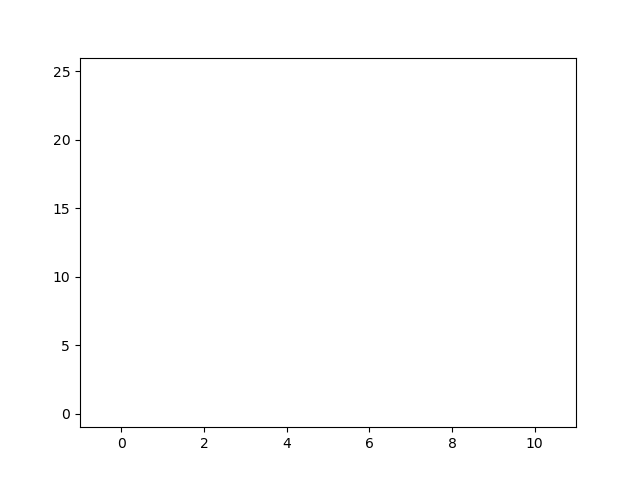

In [25]:
fig2 = plt.figure()
ax2 = plt.axes()
plt.axis([x_min-1, x_max+1, y_min-1, y_max+1])

def init():
    """создает начальное состояние графической области перед началом анимации и возвращает None"""
    global line2 # сделана глобальной, чтобы переменная line2 была видна в функции at_frame2
    
    line1, = ax2.plot(x_array, y_array,'k')  # отображение графика функции
    line2, = ax2.plot([], [],'ro') # отображение точки
    plt.legend(['$y(x) = (x-5)^2$','Мovable point']) #подпист легенды
    return None

FuncAnimation(fig2, at_frame2, frames=matrix, init_func=init, repeat=False, interval=10)


Создайте аналогичную анимацию для произвольной, Вами выбранной, нелинейной аналитической функции

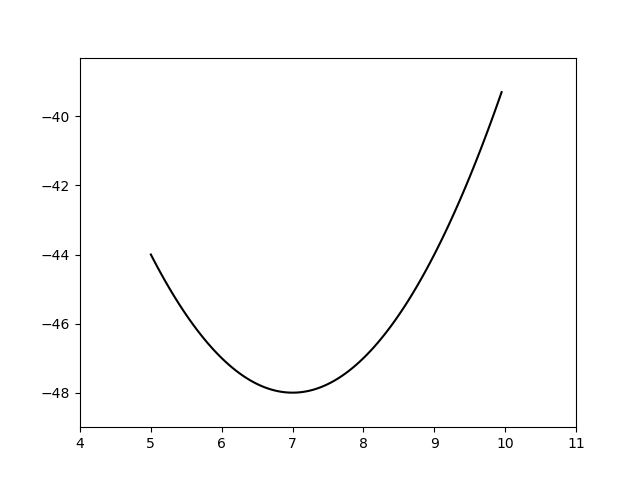

In [29]:
fig_3 = plt.figure() #создали графическое окно

ax_3 = plt.axes() #создали графическую область
plt.axis([x_min1-1, x_max1+1, y_min1-1, y_max1+1]) #

line_3, = ax_3.plot(x_array1, y_array1,'k')  # отображение графика функции
line_4, = ax_3.plot([], [],'ro') # отображение точки

In [30]:
def at_frame_2(t): 
    """пользовательская функция одного аргумента, которая будет
    
    вызываться в каждом кадре анимации.
    
    задает объект line2 точкой с координатами (t[0],t[1])
    
    Arguments :
    
    t : последовательность из двух элементов
    
    Returns : None
    """
    line_4.set_data(t)
    return None

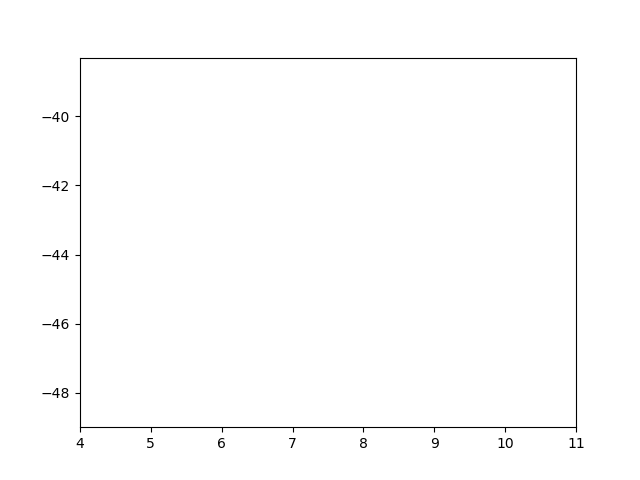

In [31]:
fig_3 = plt.figure()

ax_3 = plt.axes()
plt.axis([x_min1-1, x_max1+1, y_min1-1, y_max1+1]) 

def init1():
    """создает начальное состояние графической области перед началом анимации и возвращает None"""
    global line_4 # сделана глобальной, чтобы переменная line2 была видна в функции at_frame2
    
    line_3, = ax_3.plot(x_array1, y_array1,'k')  # отображение графика функции
    line_4, = ax_3.plot([], [],'ro') # отображение точки
    plt.legend(['$y(x) = x^2 - 14*x + 1$','Мovable point']) #подпись легенды
    return None

FuncAnimation(fig_3, at_frame_2, frames=matrix1, init_func=init1, repeat=False, interval=10)

## Задание 3.3 (Aнимация движения секущей прямой к заданной кривой)

Кривая задана графиком аналитической функции $y = y(x)$ для $x \in [x_{min},x_{max}]$ из Задания 3.1, согласно Вашему варианту. Начальная точка $A$ с координатами $(x_{min}, y(x_{min}))$ является неподвижной точкой. Подвижная точка $B$ движется последовательно по кривой от конечной точки кривой с координатами $(x_{max}, y(x_{max}))$ к неподвижной точке $A$.

$\color{red}{Создайте}$ $\color{red}{анимацию}$ движения секущей прямой, проходящей через точки $A$ и $B$ до момента совпадении координат точек $A$ и $B$, когда секущая прямая становится касательной прямой к заданной кривой в начальной точке $A$.

### Реализация Задания 3.3

Перед началом анимации графическая область должна содержать следующие графические объекты:

* график заданной функции, которая определяет траекторию движения подвижной точки $B$
* неподвижную точку $A$
* начальное положение подвижной точки $B$
* cекущую прямую, проходящую через точки $A$ и $B$

Начальное состояние графической области реализуем с помощью пользовательской функции init, которая будет передана в качестве значения аргумента init_func функции FuncAnimation, init_func=init.

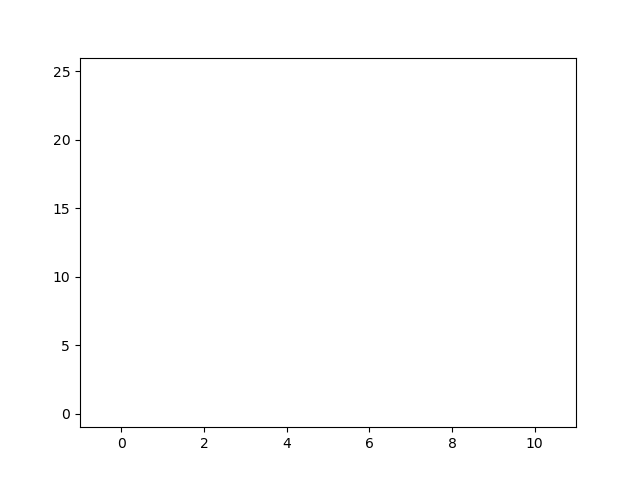

In [40]:
fig3 = plt.figure()
ax3 = plt.axes()
plt.axis([x_min-1, x_max+1, y_min-1, y_max+1])

def init():
    """cоздает начальное состояние графической области перед началом анимации и возвращает None"""
    global point_B, secant_line # сделаны глобальными, чтобы были видна в функции at_frame3
    
    curve, = ax3.plot(x_array, y_array,'k') # график функции
    
    A = np.array([x_array[0], y_array[0]]) #положение неподвижной точки А
    point_A, = ax3.plot(A[0],A[1],'bo') # неподвижная точка
    
    B = np.array([x_array[-1], y_array[-1]]) #начальное положение точки В    
    point_B, = ax3.plot(B[0],B[1],'ro') # подвижная точка
    
    secant_p = [A + (B - A)*t for t in [-2, 2]] # уравнение прямой, проходящей через точки A и В 
    secant_p = np.array(secant_p)
    secant_line, = ax3.plot(secant_p[:,0], secant_p[:,1],'g') # секущая прямая
    
    plt.legend(['$y(x) = (x-5)^2$','Unmovable point A','Мovable point B','Secant line through A and B'])
    return None

def at_frame3(t):
    """do ... 
     
    Arguments :
    
    t : массив из двух элементов
    
    Returns : None
    """
    line2.set_data(t)
    return None
    
FuncAnimation(fig3, at_frame3, frames=matrix[::-1], init_func=init, repeat=False, interval=10)    


Напиишите пользовательскую функцию at_frame3(t), которая будет вызываться в каждом кадре анимации, полагая, что аргумент $t$ является массивом координат подвижной точки $B$. Напиишите строки документации для пользовательской функции at_frame3(t).



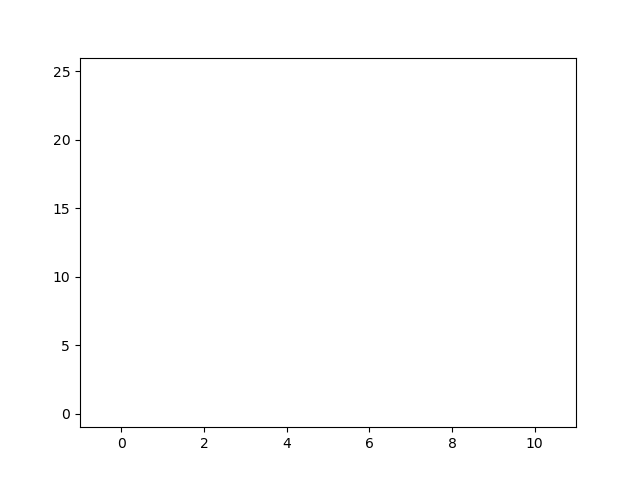

In [41]:
fig3 = plt.figure()
ax3 = plt.axes()
plt.axis([x_min-1, x_max+1, y_min-1, y_max+1])

def init():
    """cоздает начальное состояние графической области перед началом анимации и возвращает None"""
    global point_B, secant_line # сделаны глобальными, чтобы были видна в функции at_frame3
    
    curve, = ax3.plot(x_array, y_array,'k') # график функции
    
    A = np.array([x_array[0], y_array[0]]) 
    point_A, = ax3.plot(A[0],A[1],'bo') # неподвижная точка
    
    B = np.array([x_array[-1], y_array[-1]])    
    point_B, = ax3.plot([],[],'ro') # подвижная точка
    
    
    
    secant_p = [A + (B - A)*t for t in [-2, 2]] # уравнение прямой, проходящей через точки A и В 
    secant_p = np.array(secant_p)
   
    secant_line, = ax3.plot([], [],'g') # секущая прямая
    
    plt.legend(['$y(x) = (x-5)^2$','Unmovable point A','Мovable point B','Secant line through A and B'])
    return None

def at_frame3(t):
    """do ... 
     
    Arguments :
    
    t : массив из двух элементов
    
    Returns : None
    """
    point_B.set_data(t)
    
    secant_p = [A + (t - A)*k for k in [-5, 5]] #уравнение прямой, проходящей через А и В
    secant_p = np.array(secant_p) #создаем массив
    
    secant_line.set_data(secant_p[:,0],secant_p[:,1])
    
    return None
    
FuncAnimation(fig3, at_frame3, frames=matrix[::-1], init_func=init, repeat=False, interval=100)  

Обратите внимание, что при совпадении координат неподвижной точки $A$ и подвижной точки $B$ уравнение для задания секущей прямой через две точки возвращает только точку $A$. В это случае векторно-параметрическое уравнение прямой должно быть заменено на уравнение касательной прямой в точке $A$.

In [34]:
import sympy #импортируем нужный модуль

In [35]:
x = sympy.symbols('x') #теперь х = символ

In [36]:
k = sympy.diff(y(x),x) #нахождение производной заданной функции
k

2*x - 10

In [37]:
a = k.subs(x,0) #подставляем вместо символа х значение 0 и вычисляем
a

-10

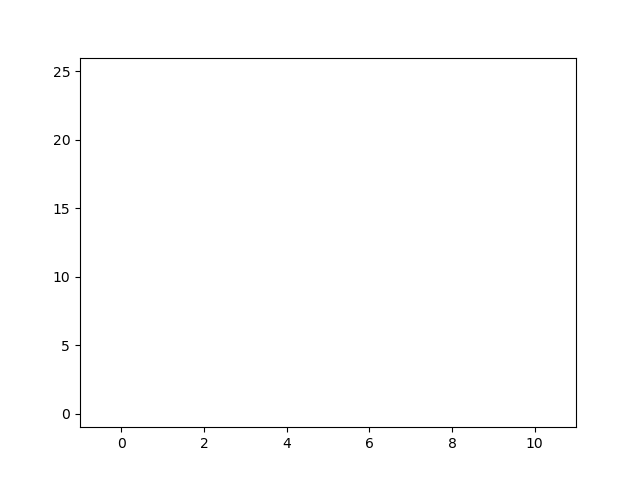

In [38]:
fig3 = plt.figure()
ax3 = plt.axes()
plt.axis([x_min-1, x_max+1, y_min-1, y_max+1]) #лимит по осям Ох и Оу

def init():
    """cоздает начальное состояние графической области перед началом анимации и возвращает None"""
    global point_B, secant_line, A # сделаны глобальными, чтобы были видна в функции at_frame3
    
    curve, = ax3.plot(x_array, y_array,'k') # график функции
    
    A = np.array([x_array[0], y_array[0]]) 
    point_A, = ax3.plot(A[0],A[1],'bo') # неподвижная точка
    
    B = np.array([x_array[-1], y_array[-1]])    
    point_B, = ax3.plot([],[],'ro') # подвижная точка
    
    
    
    secant_p = [A + (B - A)*t for t in [-2, 2]] # уравнение прямой, проходящей через точки A и В 
    secant_p = np.array(secant_p)
    
    secant_line, = ax3.plot([], [],'g') # секущая прямая
    
    plt.legend(['$y(x) = (x-5)^2$','Unmovable point A','Мovable point B','Secant line through A and B'])
    return None

def at_frame3(t):
    """do ... 
     
    Arguments :
    
    t : массив из двух элементов
    
    Returns : None
    """
    point_B.set_data(t)
    
    secant_p = [A + (t - A)*m for m in [-5, 5]]
    secant_p = np.array(secant_p) 
    if t[0] != A[0]:
        secant_line.set_data(secant_p[:,0],secant_p[:,1])
    else:
        x = sympy.symbols('x') # х = символ
        k = sympy.diff(y(x), x) # считаем производную от функции y(x) = (x-5)^2
        k_value = k.subs(x,A[0]) # считаем значение производной в точке А[0]
        
        x_crd = [-150,150] #задали список х-вых координат
        y_crd = [k_value*(x - A[0]) + A[1] for x in x_crd] #создали список координат у
        
        secant_line.set_data(x_crd,y_crd)        
    return None
    
FuncAnimation(fig3, at_frame3, frames=matrix[::-1], init_func=init, repeat=False, interval=100)  

**Вариант 5**

$y(x) = x^2 + 3x -7, k = 5, x_{min} = 5, x_{max} = 10, step = 0.05$

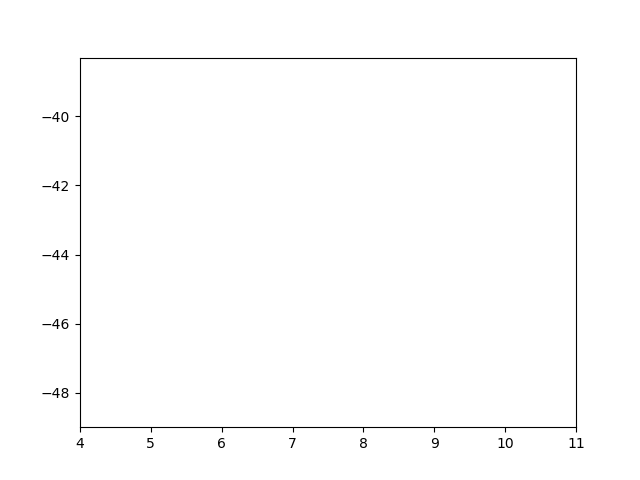

In [39]:
fig6 = plt.figure()
ax6 = plt.axes()
plt.axis([x_min1-1, x_max1+1, y_min1-1, y_max1+1]) #лимит по осям Ох и Оу

def init6():
    """cоздает начальное состояние графической области перед началом анимации и возвращает None"""
    global point_B6, secant_line6, A6 # сделаны глобальными, чтобы были видна в функции at_frame3
    
    curve6, = ax6.plot(x_array1, y_array1,'k') # график функции
    
    A6 = np.array([x_array1[0], y_array1[0]]) 
    point_A6, = ax6.plot(A6[0],A6[1],'bo') # неподвижная точка
    
    B6 = np.array([x_array1[-1], y_array1[-1]])    
    point_B6, = ax6.plot([],[],'ro') # подвижная точка
    
    
    
    secant_p6 = [A6 + (B6 - A6)*t for t in [-2, 2]] # уравнение прямой, проходящей через точки A и В 
    secant_p6 = np.array(secant_p6)
    
    secant_line6, = ax6.plot([], [],'g') # секущая прямая
    
    plt.legend(['$y_1(x) = x^2+3x-7$','Unmovable point A','Мovable point B','Secant line through A and B'])
    return None

def at_frame6(t):
    """do ... 
     
    Arguments :
    
    t : массив из двух элементов
    
    Returns : None
    """
    point_B6.set_data(t)
    
    secant_p6 = [A6 + (t - A6)*m for m in [-5, 5]]
    secant_p6 = np.array(secant_p6) 
    if t[0] != A6[0]: #если A[0] и B[0] не совпадают
        secant_line6.set_data(secant_p6[:,0],secant_p6[:,1])
    else:
        x = sympy.symbols('x') # х = символ
        k = sympy.diff(y_1(x), x) # считаем производную от функции y(x) = (x-5)^2
        k_value = k.subs(x,A6[0]) #считаем производную в точке А[0]
        
        x_crd = [-150,150] #задали список х-вых координат
        y_crd = [k_value*(x - A6[0]) + A6[1] for x in x_crd] #создали список координат у
        
        secant_line6.set_data(x_crd,y_crd)        
    return None
    
FuncAnimation(fig6, at_frame6, frames=matrix1[::-1], init_func=init6, repeat=False, interval=100)  